# Initializing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Deep_Learning/auto.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [ ]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
dataset.drop(dataset.loc[:, 'symboling' : 'engine-location'].columns, axis=1, inplace=True)
dataset.drop(dataset.loc[:, 'curb-weight' : 'fuel-system'].columns, axis=1, inplace=True)
dataset.drop(['horsepower', 'city-mpg', 'highway-mpg'], axis=1, inplace=True)

In [ ]:
dataset.head(10)

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,13495
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,16500
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000,16500
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500,13950
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500,17450
5,99.8,177.3,66.3,53.1,3.19,3.40,8.5,5500,15250
6,105.8,192.7,71.4,55.7,3.19,3.40,8.5,5500,17710
7,105.8,192.7,71.4,55.7,3.19,3.40,8.5,5500,18920
8,105.8,192.7,71.4,55.9,3.13,3.40,8.3,5500,23875
9,99.5,178.2,67.9,52.0,3.13,3.40,7.0,5500,?


In [ ]:
dataset.replace('?', np.NaN, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   bore               201 non-null    object 
 5   stroke             201 non-null    object 
 6   compression-ratio  205 non-null    float64
 7   peak-rpm           203 non-null    object 
 8   price              201 non-null    object 
dtypes: float64(5), object(4)
memory usage: 14.5+ KB


In [ ]:
dataset['bore'] = dataset['bore'].astype('float64')
dataset['stroke'] = dataset['stroke'].astype('float64')
dataset['peak-rpm'] = dataset['peak-rpm'].astype('float64')
dataset['price'] = dataset['price'].astype('float64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa214f0df98>,
      dtype=object)

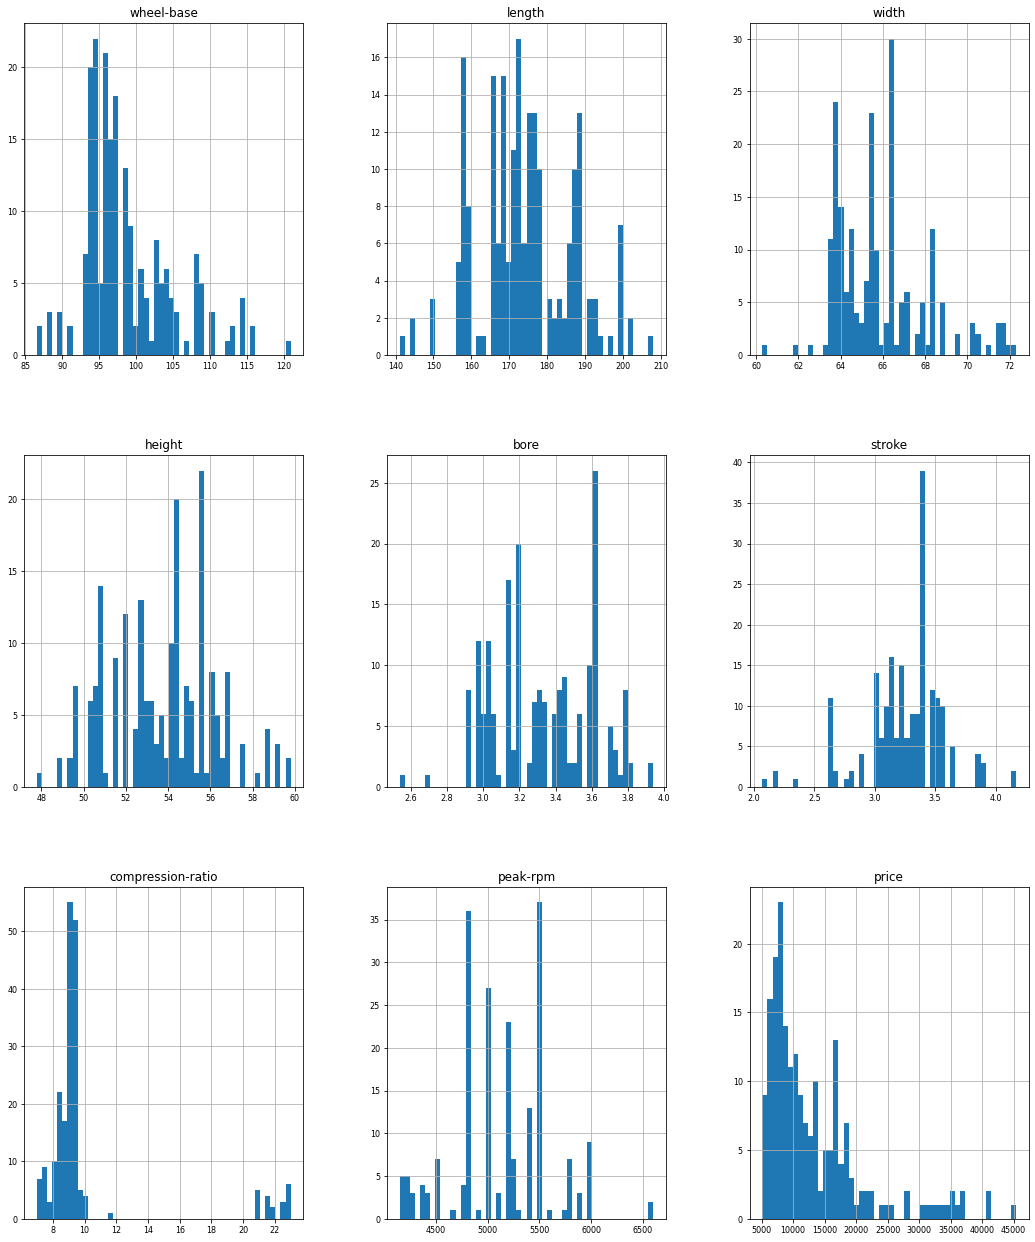

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
#Fill NAN

med_prc = dataset['price'].median(axis=0)
avg_bo = dataset['bore'].mean(axis=0)
avg_st = dataset['stroke'].mean(axis=0)
avg_rpm = dataset['peak-rpm'].mean(axis=0)

dataset['price'].replace(np.nan, med_prc, inplace=True)
dataset['bore'].replace(np.nan, avg_bo, inplace=True)
dataset['stroke'].replace(np.nan, avg_st, inplace=True)
dataset['peak-rpm'].replace(np.nan, avg_rpm, inplace=True)

In [ ]:
dataset.isnull().sum()

wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
price                0
dtype: int64

In [ ]:
corr = dataset.corr()

corr

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
wheel-base,1.000000,0.874587,0.795144,0.589435,0.488760,0.160944,0.249786,-0.360704,0.584847
length,0.874587,1.000000,0.841118,0.491029,0.606462,0.129522,0.158414,-0.287031,0.686567
width,0.795144,0.841118,1.000000,0.279210,0.559152,0.182939,0.181129,-0.219859,0.724558
height,0.589435,0.491029,0.279210,1.000000,0.171101,-0.055351,0.261214,-0.320602,0.140439
bore,0.488760,0.606462,0.559152,0.171101,1.000000,-0.055909,0.005201,-0.254761,0.532865
stroke,0.160944,0.129522,0.182939,-0.055351,-0.055909,1.000000,0.186105,-0.066844,0.083673
compression-ratio,0.249786,0.158414,0.181129,0.261214,0.005201,0.186105,1.000000,-0.435936,0.072890
peak-rpm,-0.360704,-0.287031,-0.219859,-0.320602,-0.254761,-0.066844,-0.435936,1.000000,-0.106603
price,0.584847,0.686567,0.724558,0.140439,0.532865,0.083673,0.072890,-0.106603,1.000000


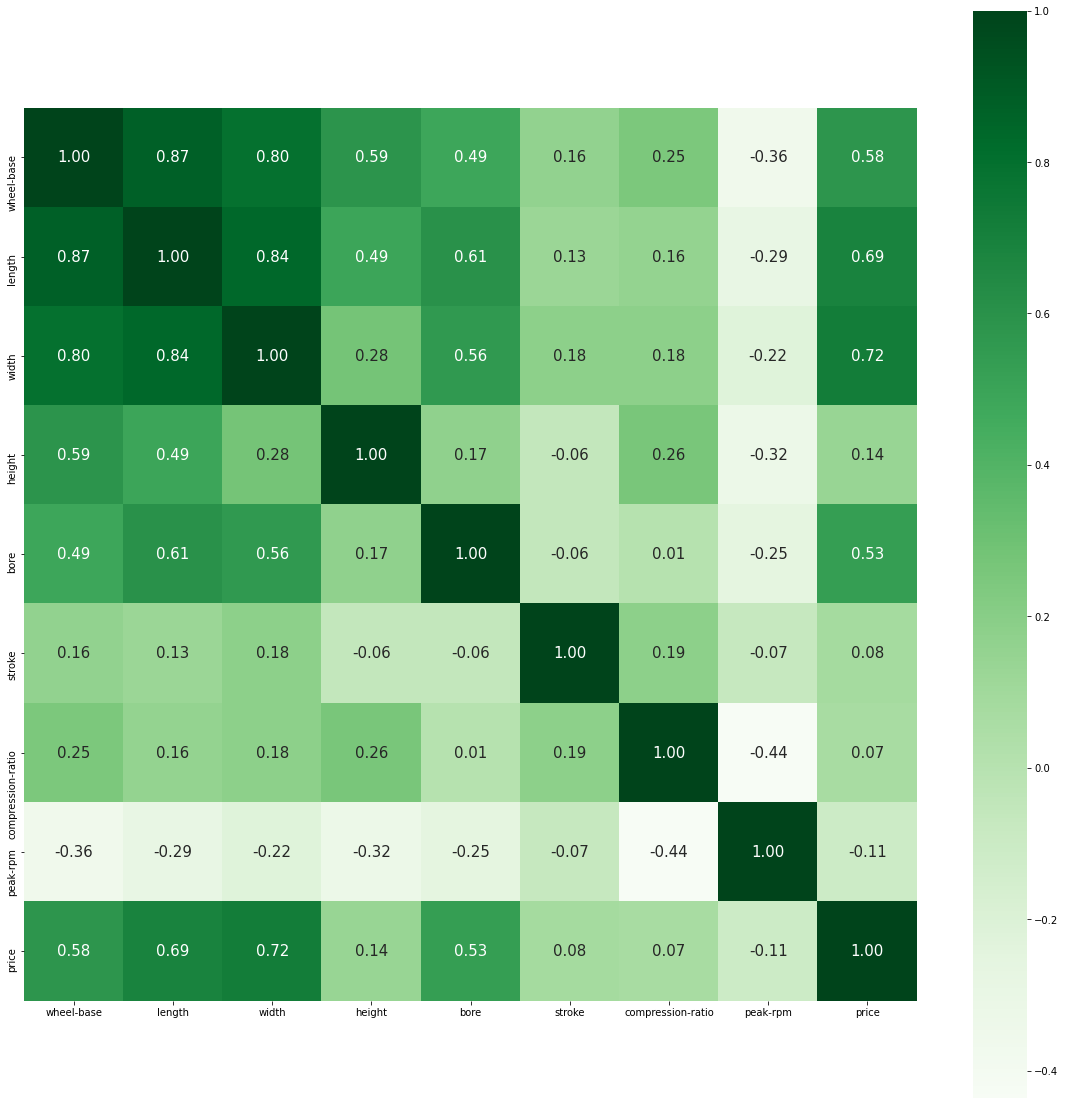

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Linear Regression

## Feature Engineering

In [ ]:
feature = dataset.drop(['price'], axis=1)
label = dataset['price']

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox')

feature = scaler.fit_transform(feature.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.2631290612208081
MAE (Mean Absolute Error) 0.3794411124151145
r^2 score 0.6658424166563504
RMSE (Root Mean Squared Error 0.512961071837628


# Deep Learning MLP

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu')) # 8 neuron, sesuai dengan 8 feature
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_mlp = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
21/21 [==============================] - 0s 7ms/step - loss: 1.0149 - val_loss: 0.7633
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9608 - val_loss: 0.7257
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.8935 - val_loss: 0.6767
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.8070 - val_loss: 0.6144
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.7022 - val_loss: 0.5439
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.5989 - val_loss: 0.4758
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.4973 - val_loss: 0.4307
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.4365 - val_loss: 0.4003
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.3940 - val_loss: 0.3820
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.3684 - val_loss: 0.3720
Epoch 11/50
21/21 [

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.23870715019943234
MAE (Mean Absolute Error) 0.34059431636172216
r^2 score 0.6968567285292924
RMSE (Root Mean Squared Error 0.4885766574442872


# Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

history_deeper = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
21/21 [==============================] - 0s 6ms/step - loss: 1.0459 - val_loss: 0.8058
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 1.0373 - val_loss: 0.7972
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 1.0183 - val_loss: 0.7783
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9743 - val_loss: 0.7380
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.8969 - val_loss: 0.6616
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 0.7778 - val_loss: 0.5673
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6330 - val_loss: 0.4806
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.5120 - val_loss: 0.4162
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.4380 - val_loss: 0.3926
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.3935 - val_loss: 0.3758
Epoch 11/50
21/21 [

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.2315803001232113
MAE (Mean Absolute Error) 0.3284935091335253
r^2 score 0.7059073859795695
RMSE (Root Mean Squared Error 0.48122790871188187


# Wider Model

In [ ]:
from tensorflow.keras.optimizers import Adam
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

opt = Adam(lr=0.001)
wider_model.compile(loss='mean_squared_error', optimizer=opt)

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 0s 6ms/step - loss: 1.0148 - val_loss: 0.7677
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.9521 - val_loss: 0.7221
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8685 - val_loss: 0.6524
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.7523 - val_loss: 0.5736
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6254 - val_loss: 0.4965
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5092 - val_loss: 0.4333
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4331 - val_loss: 0.3985
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3908 - val_loss: 0.3787
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3643 - val_loss: 0.3590
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3467 - val_loss: 0.3442
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.22708030476031413
MAE (Mean Absolute Error) 0.3245854316475781
r^2 score 0.7116221009127919
RMSE (Root Mean Squared Error 0.47652943745409276


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
60,0.184534,0.215945,60
50,0.195027,0.216596,50
61,0.183931,0.217293,61
53,0.192461,0.217489,53
46,0.197757,0.217777,46
...,...,...,...
4,0.625391,0.496503,4
3,0.752258,0.573634,3
2,0.868495,0.652410,2
1,0.952077,0.722069,1


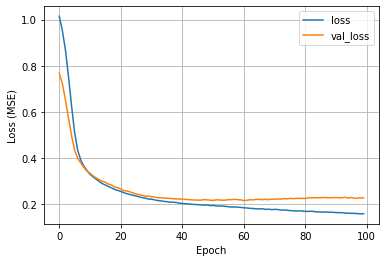

In [ ]:
plot_loss(history) # epoch vs loss graph

In [ ]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 0s 5ms/step - loss: 1.0405 - val_loss: 0.7894
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 1.0040 - val_loss: 0.7594
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.9554 - val_loss: 0.7145
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8870 - val_loss: 0.6495
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7911 - val_loss: 0.5697
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6813 - val_loss: 0.4874
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5695 - val_loss: 0.4219
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4822 - val_loss: 0.3824
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4228 - val_loss: 0.3626
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3926 - val_loss: 0.3530
Epoch 11/

In [ ]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.24277881662786158
MAE (Mean Absolute Error) 0.32696753404727913
r^2 score 0.6916859647695126
RMSE (Root Mean Squared Error 0.49272590415753625


In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
51,0.205092,0.216004,51
49,0.206501,0.216372,49
46,0.211843,0.217546,46
54,0.198314,0.217752,54
50,0.204209,0.218558,50
...,...,...,...
4,0.791095,0.569687,4
3,0.887018,0.649534,3
2,0.955388,0.714461,2
1,1.003993,0.759418,1


In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 0s 6ms/step - loss: 0.9716 - val_loss: 0.7381
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8935 - val_loss: 0.6923
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.8047 - val_loss: 0.6321
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7128 - val_loss: 0.5799
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6233 - val_loss: 0.5213
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5354 - val_loss: 0.4684
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4685 - val_loss: 0.4240
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4150 - val_loss: 0.3932
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3777 - val_loss: 0.3732
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3551 - val_loss: 0.3571
Epoch 11/

In [ ]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.23345873321768573
MAE (Mean Absolute Error) 0.3166489587016093
r^2 score 0.7035218924867181
RMSE (Root Mean Squared Error 0.4831756753166344


In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
48,0.199578,0.213179,48
54,0.192093,0.213505,54
55,0.189817,0.214137,55
57,0.187960,0.214407,57
47,0.200076,0.214416,47
...,...,...,...
4,0.623335,0.521320,4
3,0.712848,0.579942,3
2,0.804704,0.632123,2
1,0.893456,0.692323,1


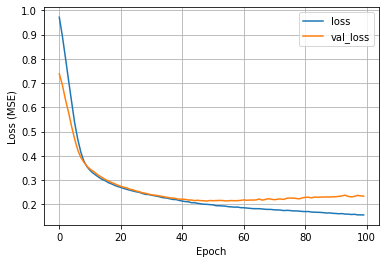

In [ ]:
plot_loss(history_rmsprop)

# Kesimpulan
Hasil terbaik diperoleh pada wider model dengan hasil akurasi tertinggi 0.7116 dan nilai mse sebesar 0.227 (Adam optimizer).